In [86]:
#Vamos importar os módulos que precisamos
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

# CIRCUITO SÉRIE:


### a. Declare as variáveis do transformador ($R_1$, $R_2$, $L_1$, $L_2$) e da fonte (frequência e tensão eficaz - Ufonte)

In [87]:
R1 = 5
Rc = 5

L = 1e-3

C = 1e-6

Uf = 10



k = 0.2

M = k*((L*L)**(1/2))


In [88]:
def CalculaResistenciaBobina(Uf, f):
    w = 2*np.pi*f
    XL = w*L*1j
    Zdc=[R1+XL, XL+R1]
    return Zdc[0], Zdc[1]


In [96]:
def CalcularTransformadorSerie(Uf, Rc, f, Rbobina):
    w = 2*np.pi*f
    XL = w*L*1j
    XC = 1/(1j*w*C)
    XM = 1j*w*M
    Z=np.array([[Rbobina+XL+XC, -XM],[-XM, Rbobina+Rc+XL+XC]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    voltagem_2 = i[1]*Rc
    potencia_entrada = np.real(0.5*Uf*i[0].conjugate())
    potencia_saida = np.real(0.5*voltagem_2*i[1].conjugate())
    return abs(i[0]), abs(i[1]), abs(voltagem_2), potencia_entrada, potencia_saida

CalcularTransformadorSerie(10, 5, 10000, R1)


(0.2269364850346363,
 0.059448680785044554,
 0.29724340392522275,
 0.14642114883509988,
 0.008835364117705314)

In [97]:
def CalcularTransformadorParalelo(Uf, f, Rbobina):
    w = 2*np.pi*f
    XL = w*L*1j
    XC = 1/(1j*w*C)
    XM = 1j*w*M
    ZP = (XC*Rc)/(XC+Rc)
    Z=np.array([[Rbobina+XL+XC, -XM],[-XM, Rbobina+XL+ZP]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    voltagem_2 = i[1]*ZP
    potencia_entrada = np.real(0.5*voltagem_2*i[0].conjugate())
    potencia_saida = abs(0.5*Uf*i[1])
    return abs(i[0]), abs(i[1]), abs(voltagem_2), potencia_entrada, potencia_saida


In [91]:
#Calcula o valor da indutância dependendo da capacitância e da frequência angular:
def CalculaIndutância(C,w):
    L = 1/((w**2)*C)
    return L

#Calcula o valor da Frequência Angular dependendo da frequência
def CalculaFrequenciaAngular(f):
    w = 2*np.pi*f
    return w

Loop para plotar os gráficos

In [98]:
def CalculaFinalSerie(frequencia, capacitor):
    Rdc = 0.2
    R_bobina = Rdc + (Rdc * frequencia * 1e-5)
    i1, i2, V2, Pin, Pout = CalcularTransformadorSerie(Uf, Rc, frequencia, R_bobina)
    eficiencia = Pout/Pin
    w = CalculaFrequenciaAngular(frequencia)
    L = CalculaIndutância(capacitor, w)
    dic = {'frequencia': frequencia, 'capacitor': capacitor, 'eficiencia': eficiencia.real, 'L': L, 'V2': V2}
    return dic


print(CalculaFinalSerie(1000, 1.5e-7))
    

{'frequencia': 1000, 'capacitor': 1.5e-07, 'eficiencia': 0.001667735004251225, 'L': 0.16886863940389632, 'V2': 0.002687218521759083}


In [93]:
def CalculaFinalParalelo(frequencia, capacitor):
    Uf = 10
    Rdc = 0.2
    R_bobina = Rdc + (Rdc * frequencia * 1e-5)
    i1, i2, V2, Pin, Pout = CalcularTransformadorParalelo(Uf, frequencia, R_bobina)
    eficiencia = Pout/Pin
    w = CalculaFrequenciaAngular(frequencia)
    L = CalculaIndutância(capacitor, w)
    dic = {'frequencia': frequencia, 'capacitor': capacitor, 'eficiencia': eficiencia.real, 'L': L, 'V2': V2}
    return dic


print(CalculaFinalParalelo(10000, 1.5e-7))
    

{'frequencia': 10000, 'capacitor': 1.5e-07, 'eficiencia': 0.004270906084662938, 'L': 0.001688686394038963, 'V2': 0.21940149568512857}


In [94]:
frequencias = np.arange(0, 100000, 1000)
Capacitores = [150e-9, 0.1e-6, 0.47e-6, 1e-6, 4.7e-6]

ZeroDivisionError: complex division by zero

<Figure size 1200x600 with 0 Axes>

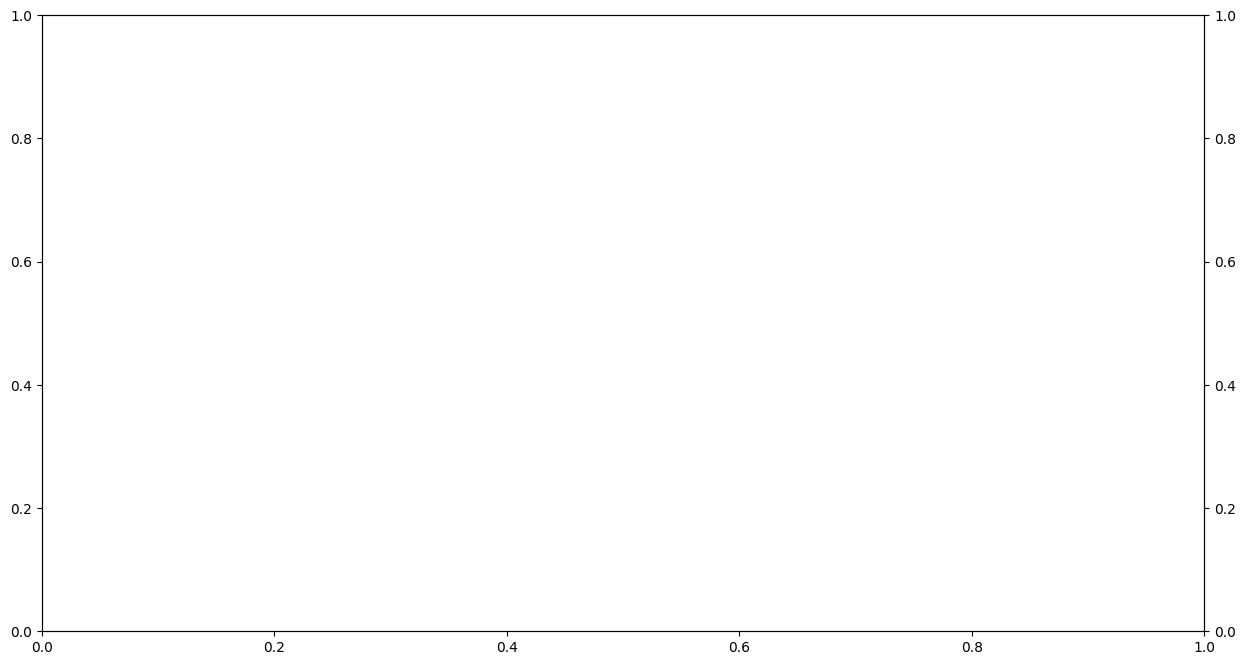

In [99]:
plt.figure(figsize=(12, 6))
fig, Eixo_X1_S = plt.subplots(figsize=(15,8))
Eixo_X2_S = Eixo_X1_S.twinx()
Cores = ['b', 'r', 'g', 'purple', 'black']

for i, c in enumerate(Capacitores):
    tensoes_serie = []
    eficiencias_serie = []
    for f in frequencias:
        dic = CalculaFinalSerie(f, c)
        tensoes_serie.append(dic['V2'])
        eficiencias_serie.append(dic['eficiencia']*100)
    Eixo_X1_S.plot(frequencias, tensoes_serie, color=Cores[i], label='Capacitor: '+str(c))
    Eixo_X2_S.plot(frequencias, eficiencias_serie, color=Cores[i], linestyle='--')
    Eixo_X1_S.set_xlabel('Frequência (Hz)')
    Eixo_X1_S.set_ylabel('Tensão de Saída (V)')
    Eixo_X2_S.set_ylabel('Eficiência (%)')
    Eixo_X1_S.legend()

plt.show()



C:\Users\aliso\AppData\Local\Temp\ipykernel_18140\2129912119.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  L = 1/((w**2)*C)


<Figure size 1200x600 with 0 Axes>

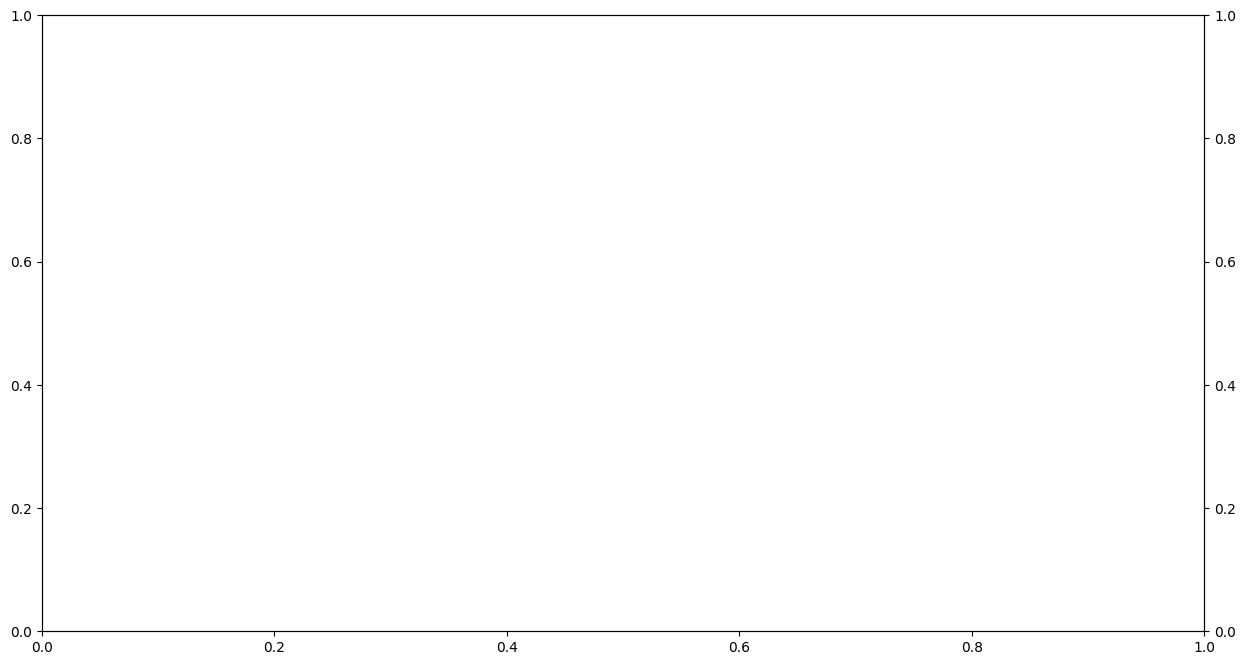

In [50]:
plt.figure(figsize=(12, 6))
fig, Eixo_X1_P = plt.subplots(figsize=(15,8))
Eixo_X2_P = Eixo_X1_P.twinx()
Cores = ['b', 'r', 'g', 'purple', 'black']

for i, c in enumerate(Capacitores):
    tensoes_paralelo = []
    eficiencias_paralelo = []
    for f in frequencias:
        dic = CalculaFinalParalelo(f, c)
        tensoes_paralelo.append(dic['V2'])
        eficiencias_paralelo.append(dic['eficiencia']*100)
    Eixo_X1_S.plot(frequencias, tensoes_paralelo, color=Cores[i], label='Capacitor: '+str(c))
    Eixo_X2_S.plot(frequencias, eficiencias_paralelo, color=Cores[i], linestyle='--')
    Eixo_X1_S.set_xlabel('Frequência (Hz)')
    Eixo_X1_S.set_ylabel('Tensão de Saída (V)')
    Eixo_X2_S.set_ylabel('Eficiência (%)')
    Eixo_X1_S.legend()

plt.show()
